
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 360s 2us/step



Epoch 1/10


1563/1563 [==============================] - 33s 19ms/step - loss: 1.5123 - accuracy: 0.4489 - val_loss: 1.2189 - val_accuracy: 0.5640
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1435 - accuracy: 0.5960 - val_loss: 1.0429 - val_accuracy: 0.6309
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9963 - accuracy: 0.6490 - val_loss: 1.0249 - val_accuracy: 0.6426
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9004 - accuracy: 0.6845 - val_loss: 0.9144 - val_accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8312 - accuracy: 0.7089 - val_los

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

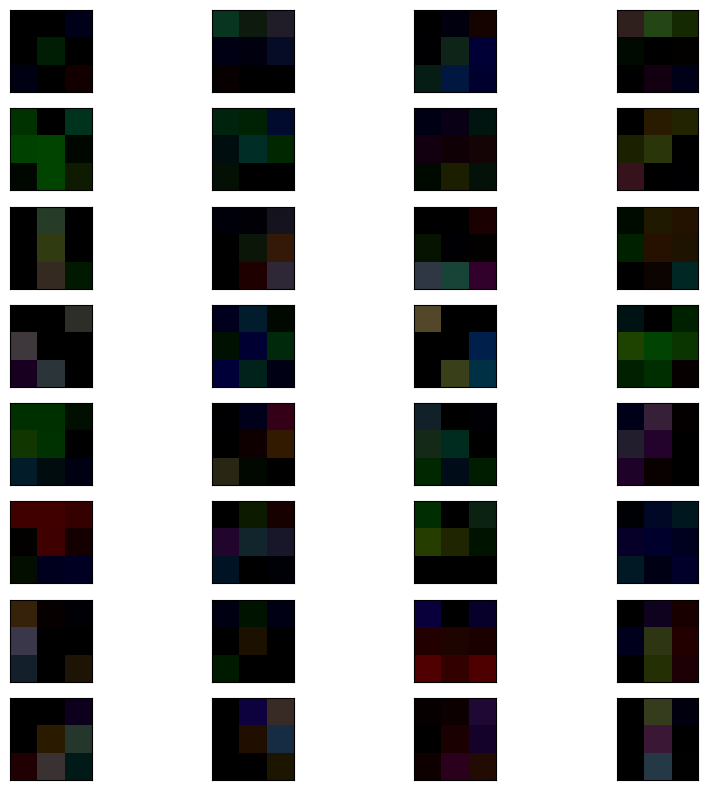

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Visualize the learned filters (convolutional kernels)
filters, biases = model.layers[0].get_weights()
plt.figure(figsize=(10, 10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(filters[:, :, :, i], cmap='gray')
plt.show()
